<a href="https://colab.research.google.com/github/x2stech-vn/google-colab/blob/main/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [23]:
! pip uninstall --quiet pillow -y
! pip install --quiet pillow==10.2.0
! pip uninstall --quiet easyocr -y
! pip install --quiet easyocr
! pip install --quiet vietocr

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/vietocr/tool/predictor.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!
EasyOCR: TM Mart 	=> VietOCR: TM Mart
EasyOCR: 01 SHO1,Tòa S106,Khu Đô Thị 	=> VietOCR: 01 SH01,Tòa S106, Khu Đô Thị
EasyOCR: Vinhomes Ocenpark 	=> VietOCR: Vinhomes Ocenpark
EasyOCR: HÓA ĐƠN BÁN HÀNG 	=> VietOCR: HÓA ĐƠN BÁN HÀNG
EasyOCR: Số: SON176058 	=> VietOCR: Số: SON176058
EasyOCR: Ngày: 15-02- 	=> VietOCR: Ngày: 15-02
EasyOCR: 2025 	=> VietOCR: 2025
EasyOCR: Khách hàng: Khách lẻ 	=> VietOCR: Khách hàng: Khách lẻ
EasyOCR: Điện thoai: 	=> VietOCR: Điện thoại:
EasyOCR: Đja chỉ: 	=> VietOCR: Địa chỉ:
EasyOCR: Đơn gla 	=> VietOCR: Đơn giá
EasyOCR: Thành tiln 	=> VietOCR: Thành tiền
EasyOCR: SL 	=> VietOCR: SL
EasyOCR: Bia Budweiser 	=> VietOCR: Bia Budweiser
EasyOCR: 23,000 	=> VietOCR: 23,000
EasyOCR: 23,Ouo 	=> VietOCR: 23.000
EasyOCR: Bla Tiger Bac 	=> VietOCR: Bla Tiger Bạc
EasyOCR: 22,0oo 	=> VietOCR: 22,000
EasyOCR: 22,Dd0 	=> VietOCR: 22,000
EasyOCR: '0 	=> VietOCR: E
EasyOCR: Pilsner lon 	=> VietOCR: Pilsnerlon
E

/usr/local/lib/python3.11/dist-packages/vietocr/tool/translate.py:115: RuntimeWarning: invalid value encountered in divide
  char_probs = np.sum(char_probs, axis=-1)/(char_probs>0).sum(-1)


EasyOCR: 333 	=> VietOCR: 333
EasyOCR: lanc 	=> VietOCR: anc
EasyOCR: 1664 	=> VietOCR: 1664
EasyOCR: khau 	=> VietOCR: chau
EasyOCR: Chiei 	=> VietOCR: chiel
EasyOCR: 87,ou0 	=> VietOCR: 87,000
EasyOCR: phai 	=> VietOCR: nhal
EasyOCR: Khach 	=> VietOCR: mhácn
EasyOCR: 87,0u0 	=> VietOCR: 87,000
EasyOCR: khách 	=> VietOCR: khacup
EasyOCR: Tra 	=> VietOCR: Trá
EasyOCR: khach 	=> VietOCR: khách
EasyOCR: Hen 	=> VietOCR: Hẹn


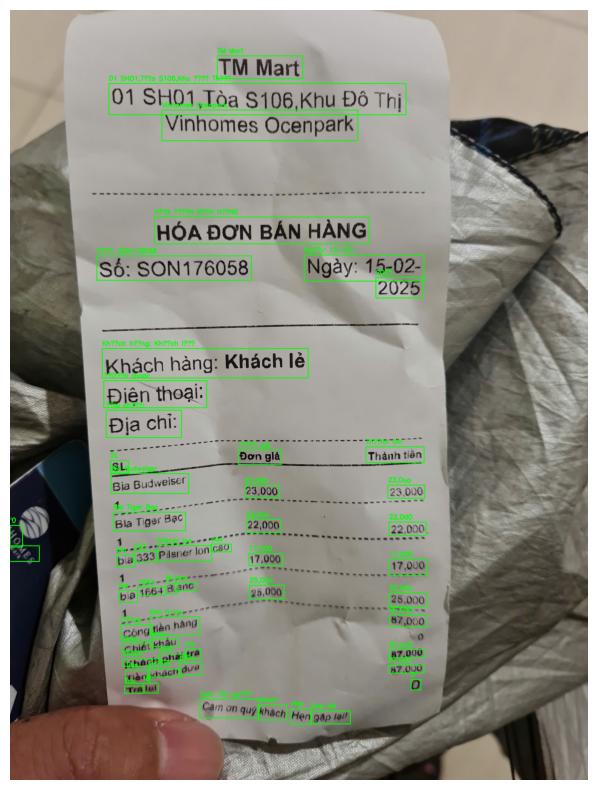

In [22]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

# Cấu hình VietOCR
config = Cfg.load_config_from_name('vgg_transformer')
config['device'] = 'cpu'  # Hoặc 'cuda' nếu có GPU
detector = Predictor(config)

# Đọc ảnh bằng OpenCV
image_path = "./bill2.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển sang RGB để hiển thị đúng màu

# Nhận diện văn bản bằng EasyOCR
reader = easyocr.Reader(['vi'])
results = reader.readtext(image_path)

# Lặp qua từng vùng văn bản nhận diện được
for (bbox, text, prob) in results:
    x_min, y_min = int(bbox[0][0]), int(bbox[0][1])
    x_max, y_max = int(bbox[2][0]), int(bbox[2][1])

    # Vẽ bounding box
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    # Cắt vùng ảnh chứa văn bản
    cropped_img = img[y_min:y_max, x_min:x_max]
    cropped_pil = Image.fromarray(cropped_img)

    # Nhận diện lại bằng VietOCR
    predicted_text = detector.predict(cropped_pil)

    # Hiển thị văn bản nhận diện lên ảnh
    cv2.putText(img, text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    print("EasyOCR:", text, "\t=> VietOCR:", predicted_text)

# Hiển thị ảnh trong Google Colab
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")  # Ẩn trục tọa độ
plt.show()


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/vietocr/tool/predictor.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!
EasyOCR: TM Mart 	=> VietOCR: TM Mart
EasyOCR: 01 SHO1,Tòa S106,Khu Đô Thị 	=> VietOCR: 01 SH01,Tòa S106, Khu Đô Thị
EasyOCR: Vinhomes Ocenpark 	=> VietOCR: Vinhomes Ocenpark
EasyOCR: HÓA ĐƠN BÁN HÀNG 	=> VietOCR: HÓA ĐƠN BÁN HÀNG
EasyOCR: Ngày: 15-02- Số: SON176058 	=> VietOCR: Số: SON176058
EasyOCR: 2025 	=> VietOCR: 2025
EasyOCR: Khách hàng: Khách lẻ 	=> VietOCR: Khách hàng: Khách lẻ
EasyOCR: Điện thoai: 	=> VietOCR: Điện thoại:
EasyOCR: Đja chỉ: 	=> VietOCR: Địa chỉ:
EasyOCR: Thành tiln Đơn gla 	=> VietOCR: Đơn giá
EasyOCR: SL 	=> VietOCR: SL
EasyOCR: Bia Budweiser 	=> VietOCR: Bia Budweiser
EasyOCR: 23,Ouo 23,000 	=> VietOCR: 23,000
EasyOCR: Bla Tiger Bac 	=> VietOCR: Bla Tiger Bạc
EasyOCR: 22,0oo 22,Dd0 '0 	=> VietOCR: Bia 1991.000.000.march.22.000
EasyOCR: cao Pilsner lon : 333 17,000 bia 17,O00 	=> VietOCR: 


/usr/local/lib/python3.11/dist-packages/vietocr/tool/translate.py:115: RuntimeWarning: invalid value encountered in divide
  char_probs = np.sum(char_probs, axis=-1)/(char_probs>0).sum(-1)


EasyOCR: lanc Bl 25,O0o 1664 bia 25,O0o 	=> VietOCR: bia 1664 Blanc 1664 Blanc
EasyOCR: 87,00o tlen h~np 	=> VietOCR: tiền hàng
EasyOCR: Công 	=> VietOCR: Công
EasyOCR: khau Chiei tre 87,ou0 phai Khach dưu 87,0u0 khách Tien 	=> VietOCR: 036000000009000
EasyOCR: 0 Iel Tra 	=> VietOCR: Trá lại
EasyOCR: Cain ơn quỷ khach Hen 9ap Iall 	=> VietOCR: Cam ơn quý khách: Hẹn gặp lạil


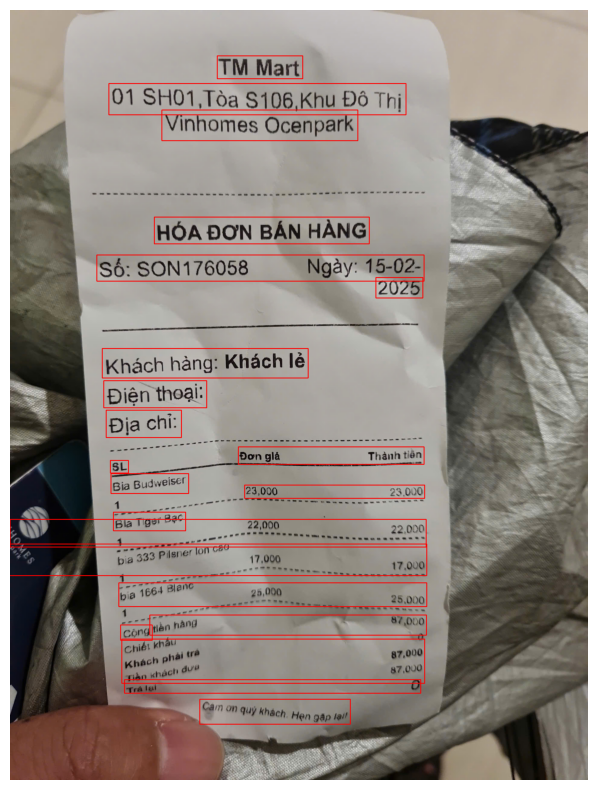

In [21]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

# Cấu hình VietOCR
config = Cfg.load_config_from_name('vgg_transformer')
config['device'] = 'cpu'  # Hoặc 'cuda' nếu có GPU
detector = Predictor(config)

# Đọc ảnh
image_path = "./bill2.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Nhận diện văn bản bằng EasyOCR
reader = easyocr.Reader(['vi'])
results = reader.readtext(image_path)

# Gom nhóm bounding box theo dòng
lines = []
for (bbox, text, prob) in results:
    x_min, y_min = int(bbox[0][0]), int(bbox[0][1])
    x_max, y_max = int(bbox[2][0]), int(bbox[2][1])
    lines.append((y_min, y_max, x_min, x_max, text))

# Sắp xếp theo y_min
lines.sort(key=lambda b: b[0])

# Gom nhóm theo dòng
grouped_lines = []
current_line = []

for i, (y_min, y_max, x_min, x_max, text) in enumerate(lines):
    if not current_line:
        current_line.append((y_min, y_max, x_min, x_max, text))
        continue

    prev_y_min, prev_y_max, _, _, _ = current_line[-1]

    if abs(y_min - prev_y_min) < 20:  # Nếu khoảng cách nhỏ, gộp vào cùng dòng
        current_line.append((y_min, y_max, x_min, x_max, text))
    else:
        grouped_lines.append(current_line)
        current_line = [(y_min, y_max, x_min, x_max, text)]

if current_line:
    grouped_lines.append(current_line)

# Xử lý VietOCR theo từng dòng
for line in grouped_lines:
    y_min = min(b[0] for b in line)
    y_max = max(b[1] for b in line)
    x_min = min(b[2] for b in line)
    x_max = max(b[3] for b in line)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

    cropped_img = img[y_min:y_max, x_min:x_max]
    cropped_pil = Image.fromarray(cropped_img)

    vietocr_text = detector.predict(cropped_pil)

    print("EasyOCR:", " ".join([b[4] for b in line]), "\t=> VietOCR:", vietocr_text)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.show()


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/vietocr/tool/predictor.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!
EasyOCR: TM Mart 	=> VietOCR: TM Mart
EasyOCR: 01 SHO1,Tòa S106,Khu Đô Thị 	=> VietOCR: 01 SH01,Tòa S106, Khu Đô Thị
EasyOCR: Vinhomes Ocenpark 	=> VietOCR: Vinhomes Ocenpark
EasyOCR: HÓA ĐƠN BÁN HÀNG 	=> VietOCR: HÓA ĐƠN BÁN HÀNG
EasyOCR: Ngày: 15-02- Số: SON176058 	=> VietOCR: Số: SON176058
EasyOCR: 2025 	=> VietOCR: 2025
EasyOCR: Khách hàng: Khách lẻ 	=> VietOCR: Khách hàng: Khách lẻ
EasyOCR: Điện thoai: 	=> VietOCR: Điện thoại:
EasyOCR: Đja chỉ: 	=> VietOCR: Địa chỉ:
EasyOCR: Thành tiln Đơn gla 	=> VietOCR: Đơn giá
EasyOCR: SL 	=> VietOCR: SL
EasyOCR: Bia Budweiser 	=> VietOCR: Bia Budweiser
EasyOCR: 23,Ouo 23,000 	=> VietOCR: 23,000
EasyOCR: Bla Tiger Bac 	=> VietOCR: Bla Tiger Bạc
EasyOCR: 22,0oo 22,Dd0 '0 	=> VietOCR: Bia 1991.000.000.march.22.000
EasyOCR: cao Pilsner lon : 333 17,000 bia 17,O00 	=> VietOCR: 


/usr/local/lib/python3.11/dist-packages/vietocr/tool/translate.py:115: RuntimeWarning: invalid value encountered in divide
  char_probs = np.sum(char_probs, axis=-1)/(char_probs>0).sum(-1)


EasyOCR: lanc Bl 25,O0o 1664 bia 25,O0o 	=> VietOCR: bia 1664 Blanc 1664 Blanc
EasyOCR: 87,00o tlen h~np 	=> VietOCR: tiền hàng
EasyOCR: Công 	=> VietOCR: Công
EasyOCR: khau Chiei tre 87,ou0 phai Khach dưu 87,0u0 khách Tien 	=> VietOCR: 036000000009000
EasyOCR: 0 Iel Tra 	=> VietOCR: Trá lại
EasyOCR: Cain ơn quỷ khach Hen 9ap Iall 	=> VietOCR: Cam ơn quý khách: Hẹn gặp lạil


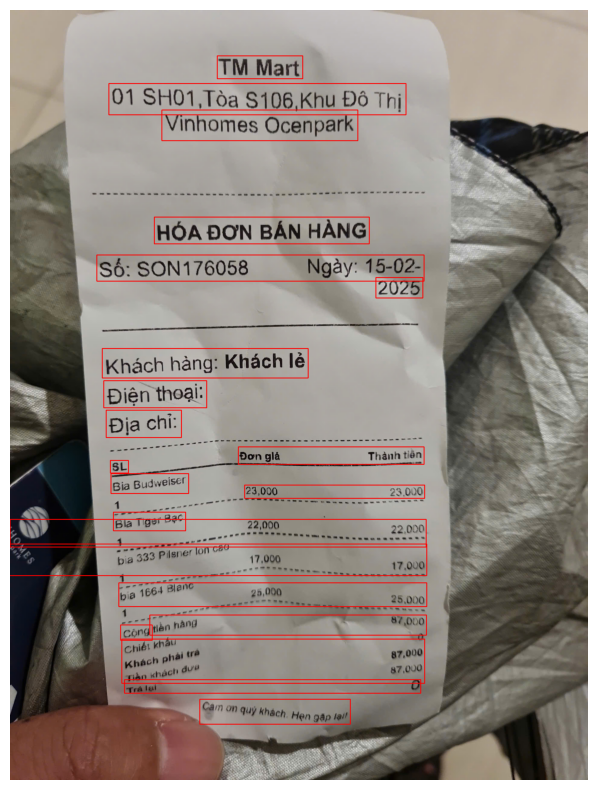

In [20]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

config = Cfg.load_config_from_name('vgg_transformer')
config['device'] = 'cpu'
detector = Predictor(config)

image_path = "./bill2.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

reader = easyocr.Reader(['vi'])
results = reader.readtext(image_path)

lines = []
for (bbox, text, prob) in results:
    x_min, y_min = int(bbox[0][0]), int(bbox[0][1])
    x_max, y_max = int(bbox[2][0]), int(bbox[2][1])
    lines.append((y_min, y_max, x_min, x_max, text))

lines.sort(key=lambda b: b[0])  # Sắp xếp theo y_min

grouped_lines = []
current_line = []

for i, (y_min, y_max, x_min, x_max, text) in enumerate(lines):
    if not current_line:
        current_line.append((y_min, y_max, x_min, x_max, text))
        continue

    prev_y_min, prev_y_max, _, _, _ = current_line[-1]

    if abs(y_min - prev_y_min) < 20:  # Ngưỡng để coi là cùng 1 dòng
        current_line.append((y_min, y_max, x_min, x_max, text))
    else:
        grouped_lines.append(current_line)
        current_line = [(y_min, y_max, x_min, x_max, text)]

if current_line:
    grouped_lines.append(current_line)

for line in grouped_lines:
    y_min = min(b[0] for b in line)
    y_max = max(b[1] for b in line)
    x_min = min(b[2] for b in line)
    x_max = max(b[3] for b in line)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

    cropped_img = img[y_min:y_max, x_min:x_max]
    cropped_pil = Image.fromarray(cropped_img)

    vietocr_text = detector.predict(cropped_pil)

    print("EasyOCR:", " ".join([b[4] for b in line]), "\t=> VietOCR:", vietocr_text)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.show()


# Inference

In [1]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [2]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [3]:
# config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
# config['device'] = 'cuda:0'

In [6]:
detector = Predictor(config)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight /tmp/vgg_transformer.pth exsits. Ignore download!


/usr/local/lib/python3.11/dist-packages/vietocr/tool/predictor.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weights, map_location=to

In [4]:
! wget https://vocr.vn/data/vietocr/sample.zip
! unzip  -qq -o sample.zip

--2025-02-19 10:27:52--  https://vocr.vn/data/vietocr/sample.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305969 (299K) [application/zip]
Saving to: ‘sample.zip.3’

sample.zip.3        100%[===================>] 298.80K  --.-KB/s    in 0.003s  

2025-02-19 10:27:52 (88.7 MB/s) - ‘sample.zip.3’ saved [305969/305969]



In [13]:
! ls sample | shuf |head -n 5

00019816.jpg
deskewed-2019_08_28_tran_thi_thanh_2019082813444611_9.jpg
deskewed-2019_09_28_051998_201909281423187_11.jpg
460_landladies_43270.jpg
97652.jpg


'VŨ THUỲ NINH'

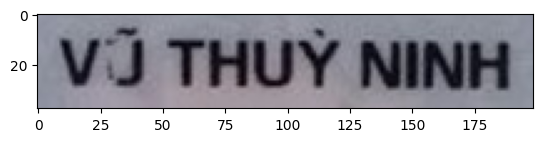

In [16]:
img = './sample/031189003299.jpeg'
# img = './bill1.jpg'
# img = './bill2.jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

EasyOCR: TM Mart 	=> VietOCR: TM Mart
EasyOCR: 01 SHO1,Tòa S106,Khu Đô Thị 	=> VietOCR: 01 SH01,Tòa S106, Khu Đô Thị
EasyOCR: Vinhomes Ocenpark 	=> VietOCR: Vinhomes Ocenpark
EasyOCR: HÓA ĐƠN BÁN HÀNG 	=> VietOCR: HÓA ĐƠN BÁN HÀNG
EasyOCR: Số: SON176058 	=> VietOCR: Số: SON176058
EasyOCR: Ngày: 15-02- 	=> VietOCR: Ngày: 15-02
EasyOCR: 2025 	=> VietOCR: 2025
EasyOCR: Khách hàng: Khách lẻ 	=> VietOCR: Khách hàng: khách lẻ
EasyOCR: Điện thoai: 	=> VietOCR: Điện thoại
EasyOCR: Đja chỉ: 	=> VietOCR: Địa chỉ:
EasyOCR: Đơn gla 	=> VietOCR: Đơn giá
EasyOCR: Thành tiln 	=> VietOCR: Thành tiền
EasyOCR: SL 	=> VietOCR: SL
EasyOCR: Bia Budweiser 	=> VietOCR: Bia Budweiser
EasyOCR: 23,000 	=> VietOCR: 23,000
EasyOCR: 23,Ouo 	=> VietOCR: 23.000
EasyOCR: Bla Tiger Bac 	=> VietOCR: Bla Tiger Bạc
EasyOCR: 22,0oo 	=> VietOCR: 22,000
EasyOCR: 22,Dd0 	=> VietOCR: 22,000
EasyOCR: '0 	=> VietOCR: E
EasyOCR: Pilsner lon 	=> VietOCR: Pilsnerlon
EasyOCR: bia 	=> VietOCR: bia
EasyOCR: 17,000 	=> VietOCR: 17,000

/usr/local/lib/python3.11/dist-packages/vietocr/tool/translate.py:115: RuntimeWarning: invalid value encountered in divide
  char_probs = np.sum(char_probs, axis=-1)/(char_probs>0).sum(-1)


EasyOCR: 333 	=> VietOCR: 333
EasyOCR: lanc 	=> VietOCR: anc
EasyOCR: 1664 	=> VietOCR: 1664
EasyOCR: khau 	=> VietOCR: chau
EasyOCR: Chiei 	=> VietOCR: chiel
EasyOCR: 87,ou0 	=> VietOCR: 87,000
EasyOCR: phai 	=> VietOCR: nhal
EasyOCR: Khach 	=> VietOCR: mhácn
EasyOCR: 87,0u0 	=> VietOCR: 87,000
EasyOCR: khách 	=> VietOCR: khacup
EasyOCR: Tra 	=> VietOCR: Trá
EasyOCR: khach 	=> VietOCR: khách
EasyOCR: Hen 	=> VietOCR: Hẹn


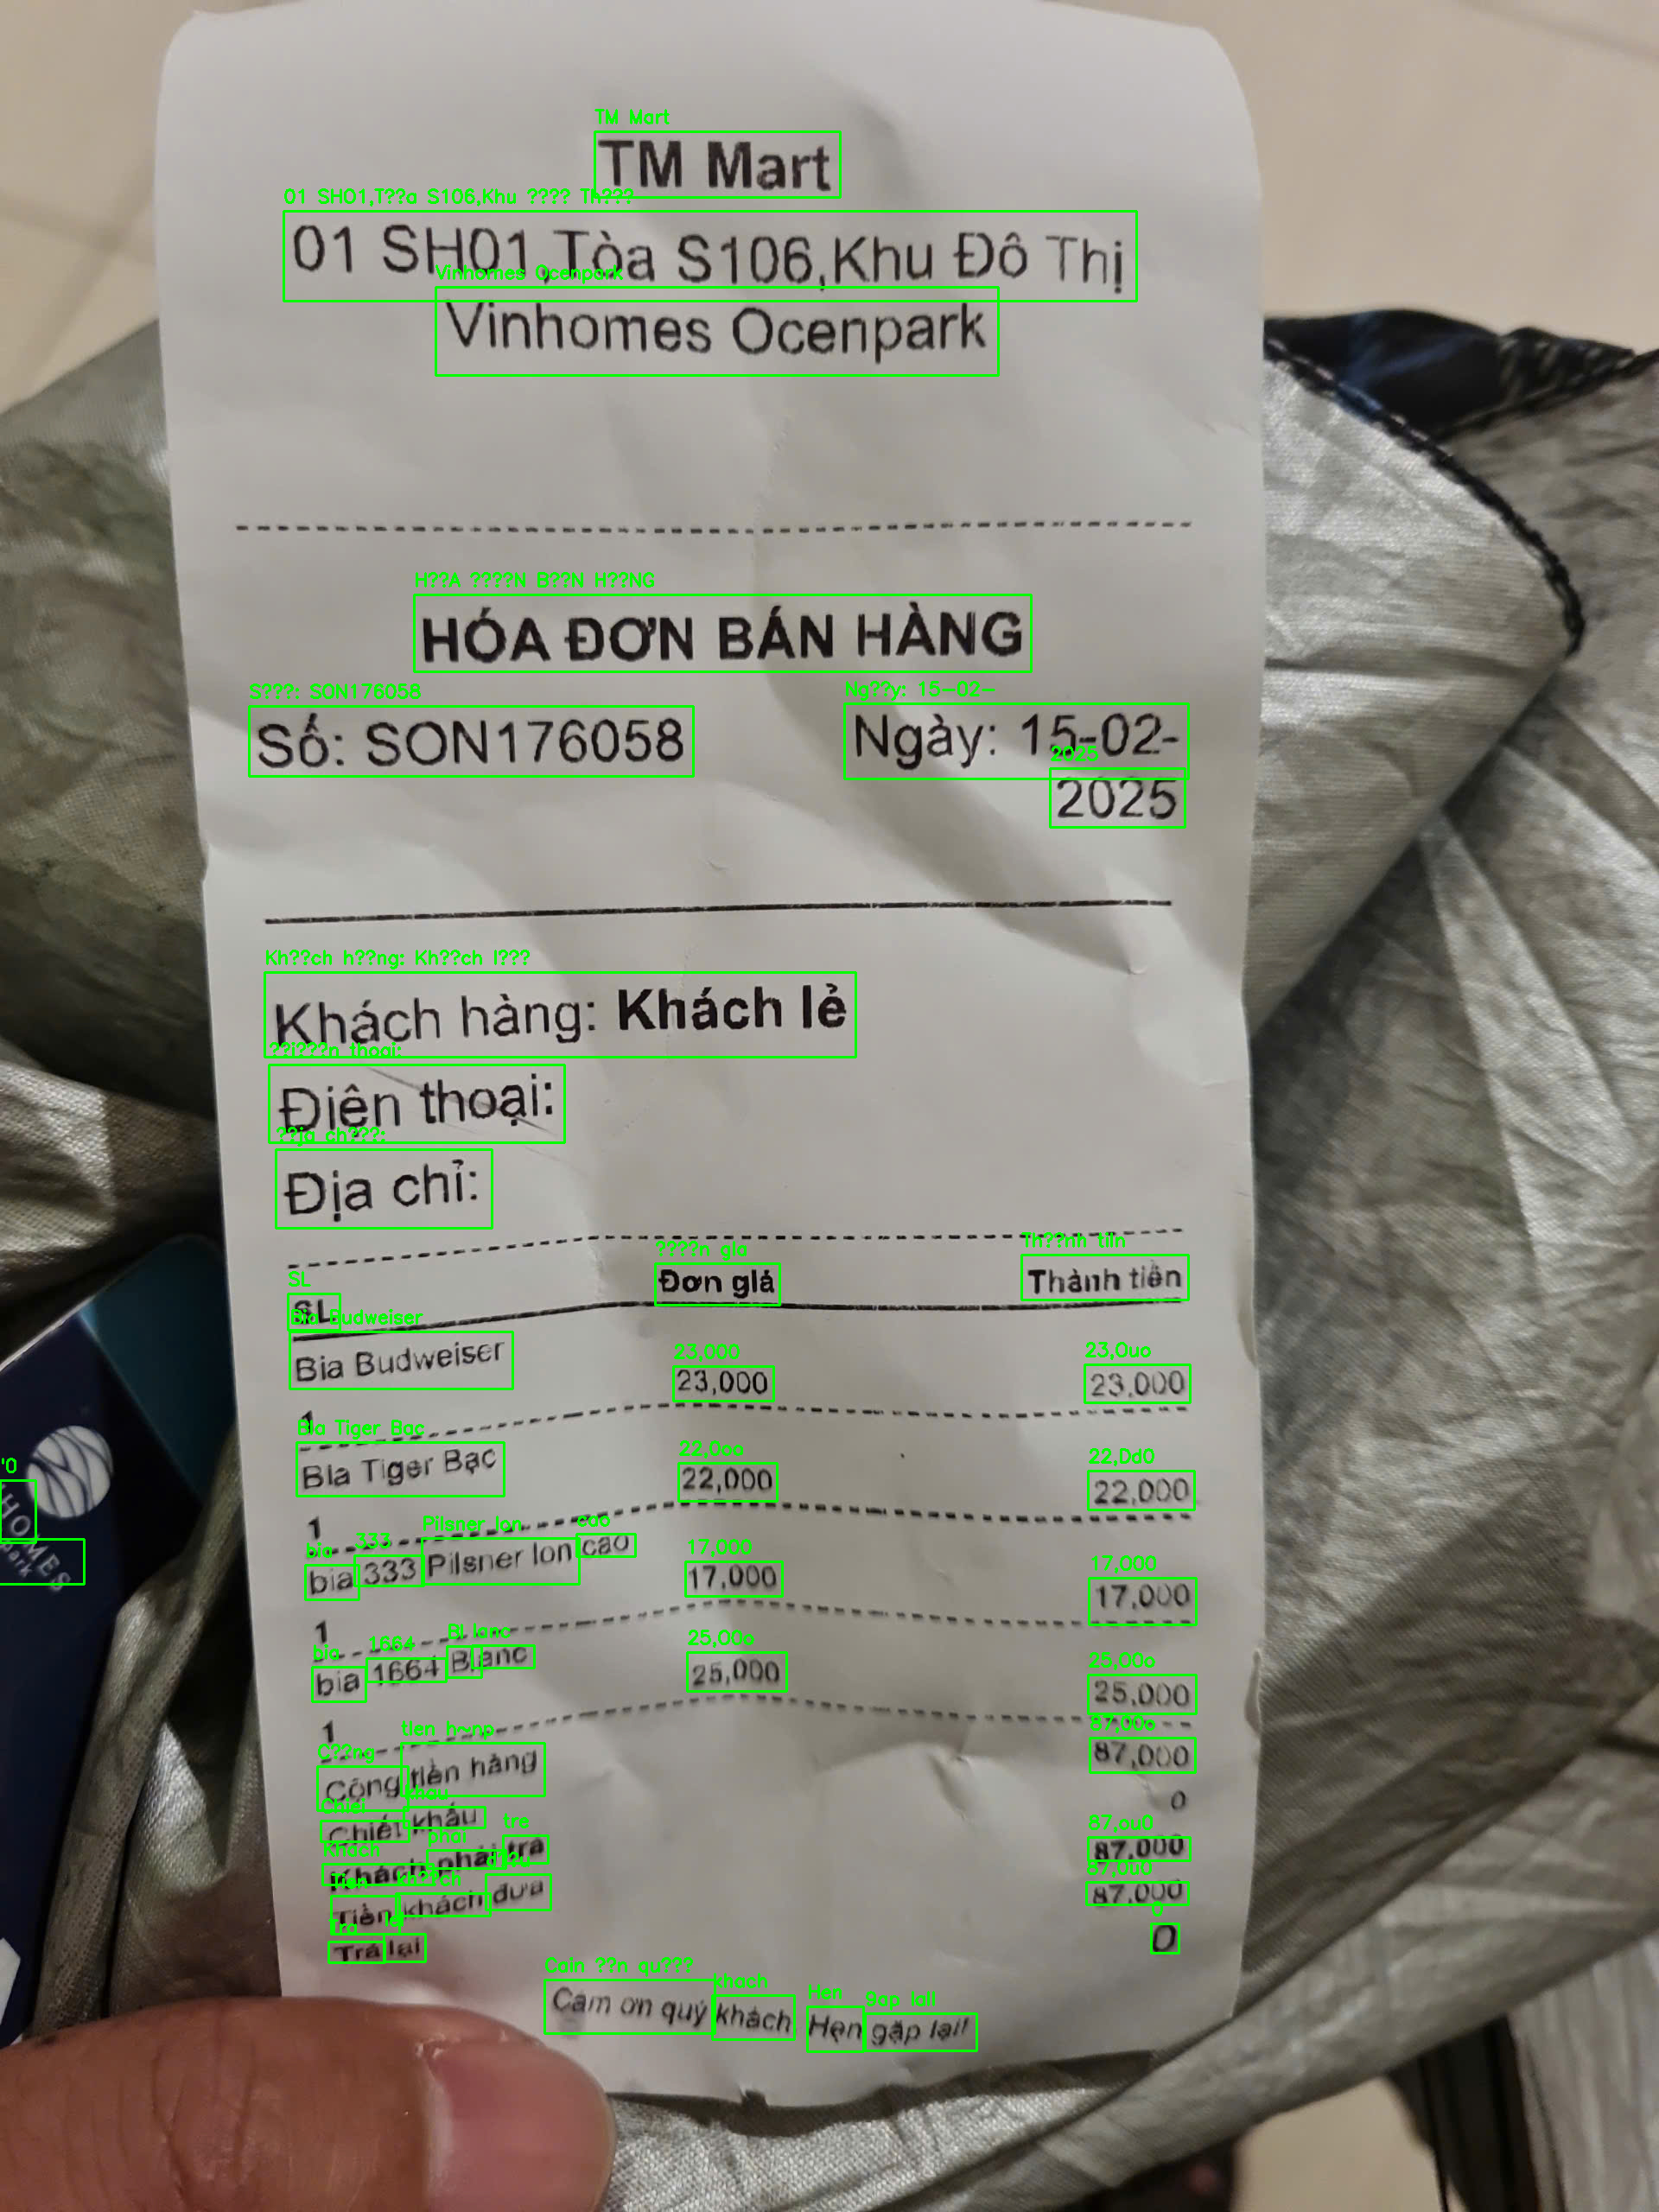

In [18]:
import easyocr
import cv2
from google.colab.patches import cv2_imshow

# Đọc ảnh bằng OpenCV
image_path = "./bill2.jpg"
img = cv2.imread(image_path)

# Nhận diện văn bản bằng EasyOCR
reader = easyocr.Reader(['vi'])
results = reader.readtext(image_path)

# Lặp qua từng vùng văn bản nhận diện được
for (bbox, text, prob) in results:
    x_min, y_min = int(bbox[0][0]), int(bbox[0][1])
    x_max, y_max = int(bbox[2][0]), int(bbox[2][1])

    # Vẽ bounding box
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    # Cắt vùng ảnh chứa văn bản
    cropped_img = img[y_min:y_max, x_min:x_max]
    cropped_pil = Image.fromarray(cropped_img)

    # Nhận diện lại bằng VietOCR
    predicted_text = detector.predict(cropped_pil)

    # Hiển thị văn bản nhận diện lên ảnh
    cv2.putText(img, text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    print("EasyOCR:", text, "\t=> VietOCR:", predicted_text)

# Hiển thị ảnh với bounding box
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Download sample dataset

In [15]:
! wget https://vocr.vn/data/vietocr/data_line.zip

--2025-02-19 10:11:41--  https://vocr.vn/data/vietocr/data_line.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61212284 (58M) [application/zip]
Saving to: ‘data_line.zip’

data_line.zip       100%[===================>]  58.38M   367MB/s    in 0.2s    

2025-02-19 10:11:41 (367 MB/s) - ‘data_line.zip’ saved [61212284/61212284]



In [ ]:
! unzip -qq -o ./data_line.zip

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [ ]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:

dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [ ]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt',
  'image_height': 32,
  'image_min_width': 32

You should train model from our pretrained

In [ ]:
trainer = Trainer(config, pretrained=True)

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!


Create train_hw: 100%|████████████████████████████████████████| 5483/5483 [00:03<00:00, 1704.08it/s]

Created dataset with 5482 samples



train_hw build cluster: 100%|███████████████████████████████| 5482/5482 [00:00<00:00, 149349.97it/s]
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Create valid_hw: 100%|████████████████████████████████████████| 1813/1813 [00:01<00:00, 1775.55it/s]


Created dataset with 1812 samples


valid_hw build cluster: 100%|███████████████████████████████| 1812/1812 [00:00<00:00, 138331.64it/s]


Save model configuration for inference, load_config_from_file

In [ ]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

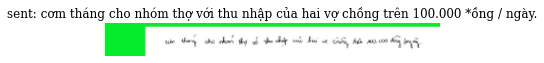

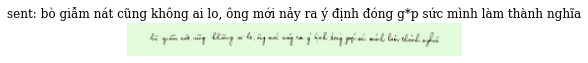

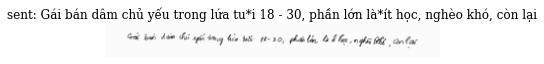

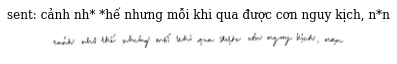

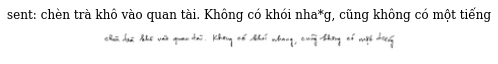

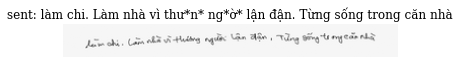

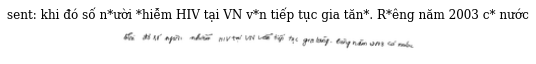

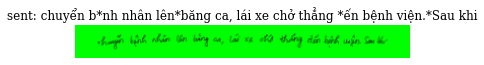

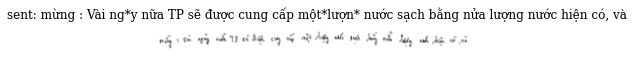

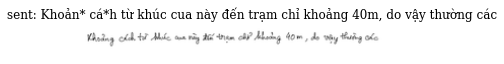

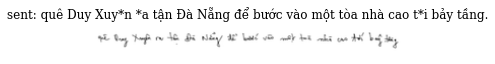

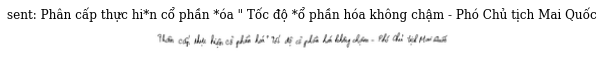

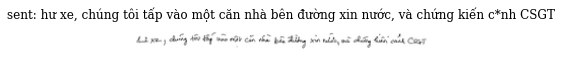

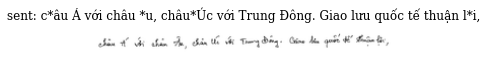

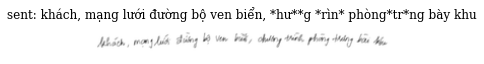

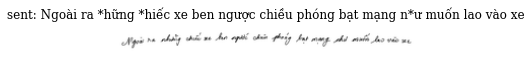

In [ ]:
trainer.visualize_dataset()

Train now

In [ ]:
trainer.train()

iter: 000200 - train loss: 1.593 - lr: 1.91e-05 - load time: 1.86 - gpu time: 86.34


KeyboardInterrupt: ignored

Visualize prediction from our trained model


In [ ]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()